In [1]:
import numpy as np
import pandas as pd

In [2]:
#reading data set
human=pd.read_csv("Country-data.csv")
human.head(20)
#human.shape

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [3]:
human.columns
human.describe(percentiles=[.25,.5,.75,.90,.95,.99])
human.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [4]:
#checking for blanks to each rows and columns
human.isnull().sum(axis=0).sort_values(ascending=True)
human.isnull().sum(axis=1).sort_values(ascending=True)

0      0
106    0
107    0
108    0
109    0
110    0
111    0
112    0
113    0
114    0
115    0
116    0
117    0
118    0
119    0
120    0
121    0
122    0
105    0
123    0
104    0
102    0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
      ..
74     0
75     0
76     0
77     0
78     0
79     0
80     0
63     0
41     0
62     0
60     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
61     0
166    0
Length: 167, dtype: int64

In [5]:
#Checking country
human["country"].value_counts().sort_values(ascending=False)

Burundi                           1
Australia                         1
Algeria                           1
Seychelles                        1
Vietnam                           1
Cambodia                          1
Niger                             1
Venezuela                         1
Ukraine                           1
Kuwait                            1
Brunei                            1
Afghanistan                       1
Timor-Leste                       1
Chad                              1
Haiti                             1
Macedonia, FYR                    1
Romania                           1
Slovak Republic                   1
Switzerland                       1
El Salvador                       1
Brazil                            1
St. Vincent and the Grenadines    1
Togo                              1
Mongolia                          1
Costa Rica                        1
Russia                            1
Bahamas                           1
New Zealand                 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure (figsize=(10,10))
sns.heatmap(human.corr(),annot=True)

In [7]:
#Breaking data 
X_human=human[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]
Y_human=human[["country"]]

In [8]:
#Standardising Data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
X_human_scaler = preprocessing.StandardScaler().fit_transform(X_human)
X_human_scaler

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [9]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

In [10]:
#Fitting PCA over data
X_human_pca=pca.fit(X_human_scaler)

In [11]:
X_human_pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca.explained_variance_ratio_.cumsum()

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

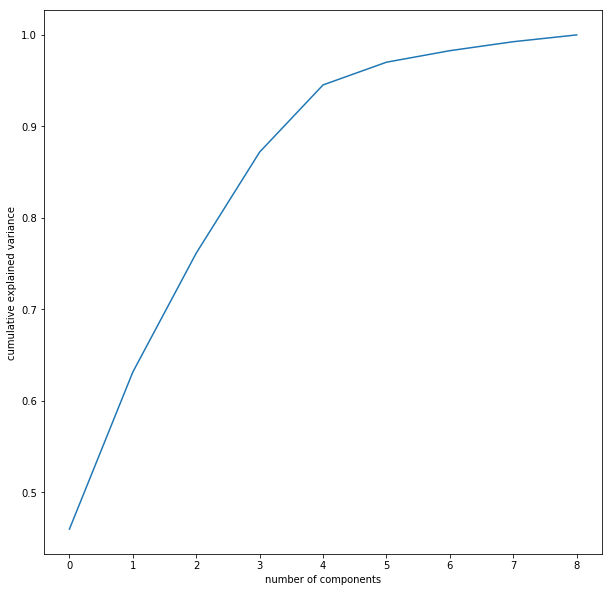

In [13]:
plt.figure(figsize=(10,10))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# Four componenets are enough to explain 87% of variance in dataset

In [14]:
#Using incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [15]:
X_human_pca2 = pca_final.fit_transform(X_human_scaler)
#X_human_pca2.shape
X_human_pca2
X_human_pca2_df=pd.DataFrame(X_human_pca2)
X_human_pca2_df

,0,1,2,3
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808
5,0.028470,-1.756721,-0.793520,-0.052486
6,-0.102849,-0.567476,-0.277669,-1.458321
7,2.339456,-1.998120,-0.237052,1.132490
8,2.973859,-0.734849,0.548421,1.192561
9,-0.180006,-0.393752,-0.864255,-0.426657


In [16]:
#creating correlation matrix for the principal components
X_human_pca2_corrmat = np.corrcoef(X_human_pca2.transpose())

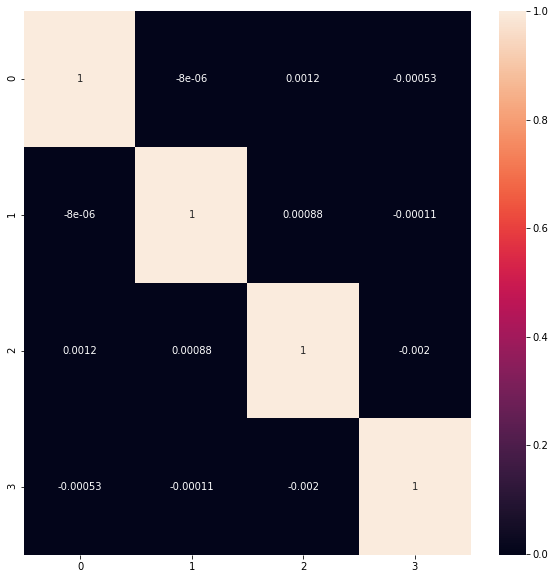

In [17]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,10))
sns.heatmap(X_human_pca2_corrmat,annot = True)

In [18]:
#Subtracting diagonl matrix to remove 1's, we get very low correlation values as compared to original dataset.
#Thus no multicollineraity
X_human_pca2_corrmat_nodiag=X_human_pca2_corrmat- np.diagflat(X_human_pca2_corrmat.diagonal())
print ("Max corr: ",X_human_pca2_corrmat_nodiag.max(), "Min corr: ",X_human_pca2_corrmat_nodiag.min(),)

Max corr:  0.0011961925092543494 Min corr:  -0.002037829535552357


In [19]:
#Create DF of components from PCA
pca.components_ #Find no of components
human_components_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                                    'PC4':pca.components_[3],'Feature':X_human.columns })
human_components_df

,PC1,PC2,PC3,PC4,Feature
0,-0.419519,0.192884,-0.029544,0.370653,child_mort
1,0.283897,0.613163,0.144761,0.003091,exports
2,0.150838,-0.243087,-0.596632,0.461897,health
3,0.161482,0.671821,-0.299927,-0.071907,imports
4,0.398441,0.022536,0.301548,0.392159,income
5,-0.193173,-0.008404,0.642520,0.150442,inflation
6,0.425839,-0.222707,0.113919,-0.203797,life_expec
7,-0.403729,0.155233,0.019549,0.378304,total_fer
8,0.392645,-0.046022,0.122977,0.531995,gdpp


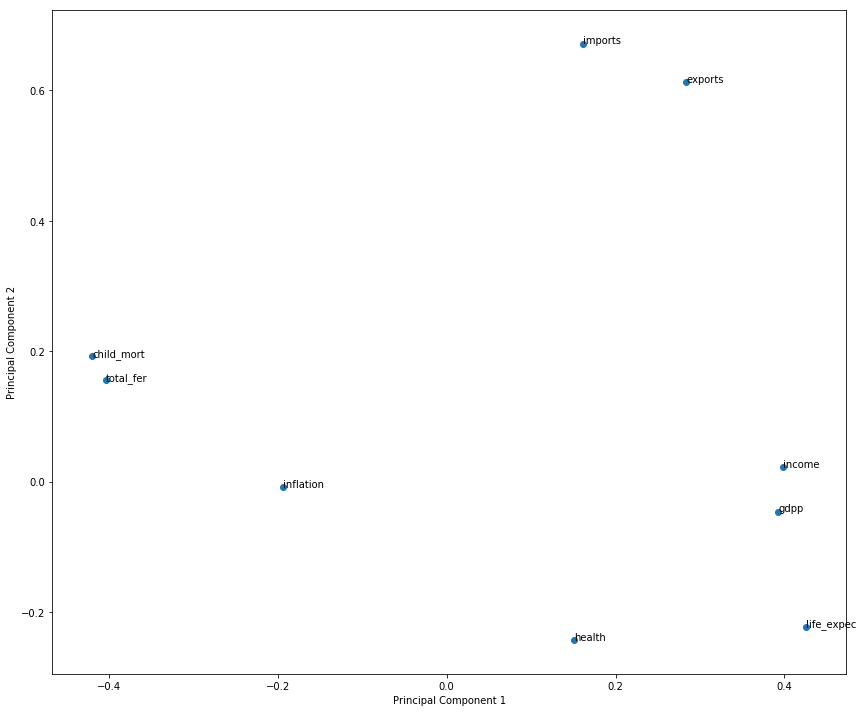

In [20]:
#Plotting PC1 & PC2 with features
%matplotlib inline
fig = plt.figure(figsize = (12,10))
plt.scatter(human_components_df.PC1, human_components_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(human_components_df.Feature):
    plt.annotate(txt, (human_components_df.PC1[i],human_components_df.PC2[i]))
plt.tight_layout()
plt.show()

In [21]:
#Create DF of components from PCA at respondent level
X_human_df = pd.DataFrame(X_human_pca2,columns=['PC1','PC2','PC3','PC4'])
X_human_df

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808
5,0.028470,-1.756721,-0.793520,-0.052486
6,-0.102849,-0.567476,-0.277669,-1.458321
7,2.339456,-1.998120,-0.237052,1.132490
8,2.973859,-0.734849,0.548421,1.192561
9,-0.180006,-0.393752,-0.864255,-0.426657


In [22]:
#Data merged 
human_final_df = pd.concat([ Y_human,X_human_df,X_human], axis = 1)
human_final_df

,country,PC1,PC2,PC3,PC4,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,0.429358,-0.587859,0.321052,-1.171193,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,-2.930969,1.699437,-1.521734,0.875966,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,0.028470,-1.756721,-0.793520,-0.052486,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,-0.102849,-0.567476,-0.277669,-1.458321,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,2.339456,-1.998120,-0.237052,1.132490,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,2.973859,-0.734849,0.548421,1.192561,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,-0.180006,-0.393752,-0.864255,-0.426657,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


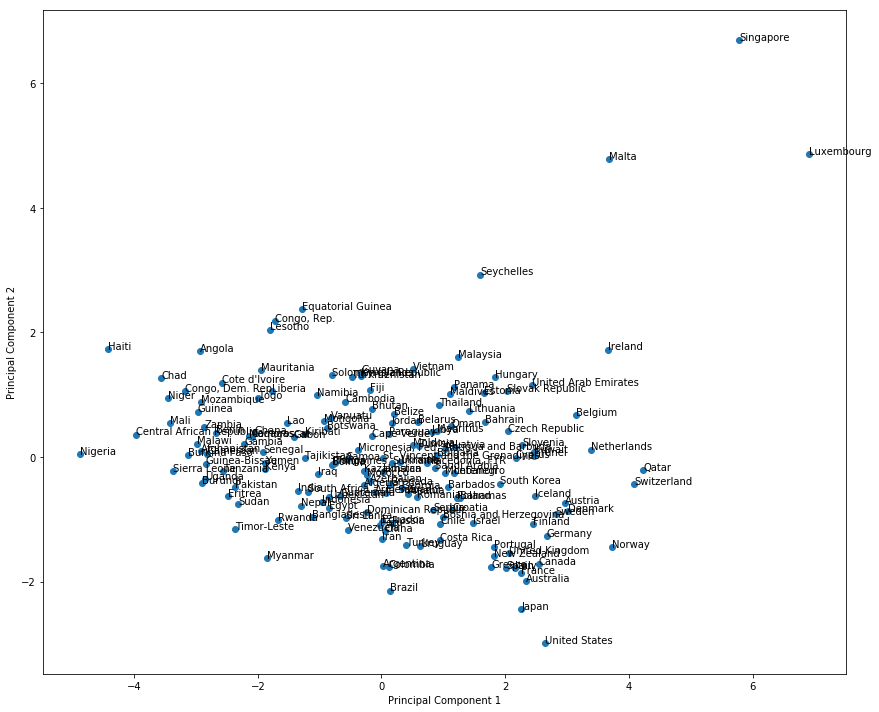

In [23]:
#Plotting PC1 & PC2 as they explain maximum variance of dataset against features
%matplotlib inline
fig = plt.figure(figsize = (12,10))
plt.scatter(human_final_df.PC1, human_final_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(human_final_df.country):
    plt.annotate(txt, (human_final_df.PC1[i],human_final_df.PC2[i]))
plt.tight_layout()
plt.show()

In [24]:
#defining function for outliers and removing them
def outlier(df,col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df_out = df.loc[(df[col_name]>low) & (df[col_name]<high)]
    return df_out

In [25]:
human_final_df1 = outlier(human_final_df,"PC1")

In [26]:
human_final_df1 = outlier(human_final_df1,"PC2")

In [27]:
human_final_df1 = outlier(human_final_df1,"PC3")

In [28]:
human_final_df1 = outlier(human_final_df1,"PC4")

In [29]:
human_final_df1

,country,PC1,PC2,PC3,PC4,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,0.429358,-0.587859,0.321052,-1.171193,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,-2.930969,1.699437,-1.521734,0.875966,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,0.028470,-1.756721,-0.793520,-0.052486,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,-0.102849,-0.567476,-0.277669,-1.458321,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,2.339456,-1.998120,-0.237052,1.132490,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,2.973859,-0.734849,0.548421,1.192561,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,-0.180006,-0.393752,-0.864255,-0.426657,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


In [30]:
#adding index to dataframe after removing outliers
human_final_df1.index = pd.RangeIndex(len(human_final_df1.index))
human_final_df1

,country,PC1,PC2,PC3,PC4,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,0.429358,-0.587859,0.321052,-1.171193,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,-2.930969,1.699437,-1.521734,0.875966,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,0.028470,-1.756721,-0.793520,-0.052486,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,-0.102849,-0.567476,-0.277669,-1.458321,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,2.339456,-1.998120,-0.237052,1.132490,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,2.973859,-0.734849,0.548421,1.192561,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,-0.180006,-0.393752,-0.864255,-0.426657,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


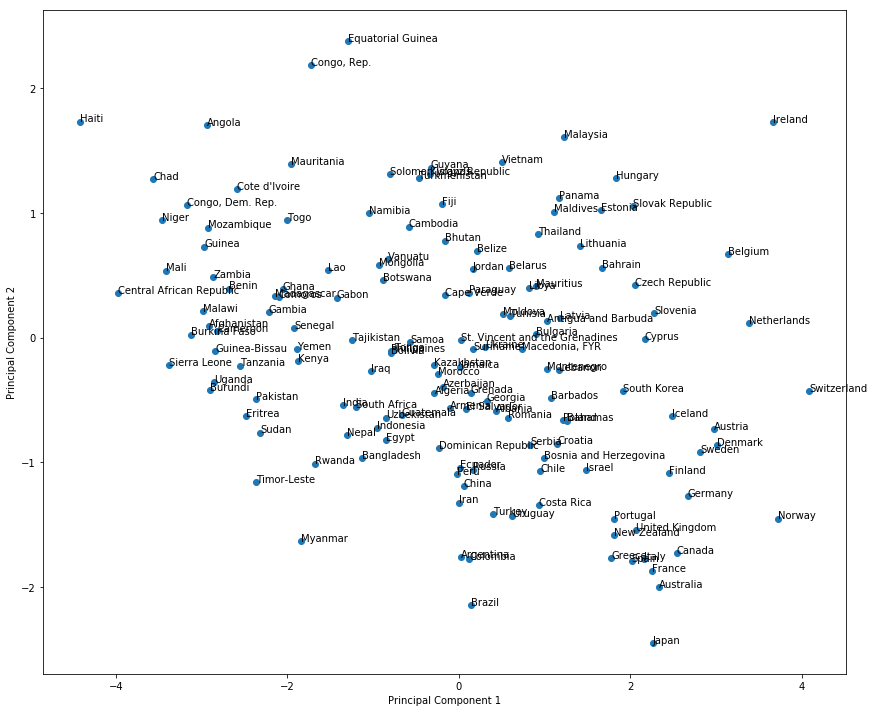

In [31]:
#Plotting PC1 & PC2 for country after removing outliers, data seems to be well spread
#using this dataset for clustering
%matplotlib inline
fig = plt.figure(figsize = (12,10))
plt.scatter(human_final_df1.PC1, human_final_df1.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(human_final_df1.country):
    plt.annotate(txt,(human_final_df1.PC1[i],human_final_df1.PC2[i]))
plt.tight_layout()
plt.show()
#final data after PCA human_final_df1

# Hopkins Statistics:

In [32]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [33]:
human_final_df2=human_final_df1.drop(["country"],axis=1)
hopkins(human_final_df2)
#with a value of 0.92 this has high tendency to form cluster

0.9660398417184455

# Silhouette Analysis

In [34]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(human_final_df2)
    sse_.append([k, silhouette_score(human_final_df2, kmeans.labels_)])
sse_

[[2, 0.7375264179218975],
 [3, 0.6276770338063105],
 [4, 0.588840784458663],
 [5, 0.6047031801450625],
 [6, 0.5628060016922962],
 [7, 0.5466130558058616],
 [8, 0.5341206410835442],
 [9, 0.5324063721415586],
 [10, 0.5262943611214906],
 [11, 0.516506397380838],
 [12, 0.49779095501223203],
 [13, 0.5083457365603853],
 [14, 0.4897041024439805]]

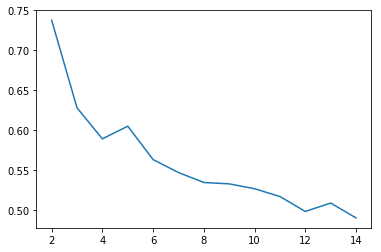

In [35]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

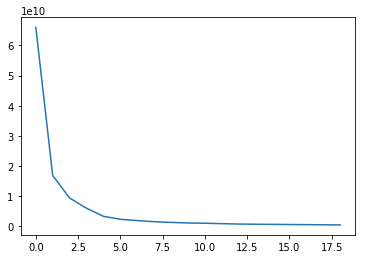

In [36]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,20)):
    mod_clust = KMeans(n_clusters = num_clusters, max_iter=50)
    mod_clust.fit(human_final_df2)
    ssd.append(mod_clust.inertia_)

plt.plot(ssd)

In [37]:
#using no of clusters as 4
model_clus4 = KMeans(n_clusters = 4, max_iter=300,random_state=3425)
model_clus4.fit(human_final_df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=3425, tol=0.0001, verbose=0)

In [38]:
# analysis of clusters formed
human_km = pd.concat([human_final_df1, pd.Series(model_clus4.labels_)], axis=1)
human_km.columns = ['country','PC1','PC2','PC3','PC4','child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']
human_km
km_clusters_child_mort = pd.DataFrame(human_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(human_km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(human_km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(human_km.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(human_km.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(human_km.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec =pd.DataFrame(human_km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(human_km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(human_km.groupby(["ClusterID"]).gdpp.mean())

In [39]:
clus_human = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort ,km_clusters_exports ,km_clusters_health ,km_clusters_imports 
                        ,km_clusters_income ,km_clusters_inflation,km_clusters_life_expec 
                        ,km_clusters_total_fer ,km_clusters_gdpp], axis=1)
clus_human.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", 
                      "imports_mean", "income_mean", "inflation_mean", "life_expec_mean", "total_fer_mean","gdpp_mean"]
clus_human.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,13.180000,48.673333,7.886667,45.726667,30686.666667,3.778667,77.693333,1.980000,24720.00000
1,1,4.068750,47.275000,10.363125,42.556250,43137.500000,1.386750,80.981250,1.801250,51000.00000
2,2,17.835000,42.982500,6.826750,44.327500,16043.000000,6.586950,73.337500,2.055250,8787.50000
3,3,62.365385,31.629474,5.897949,44.367512,4379.269231,8.781872,65.200000,3.889231,1956.75641


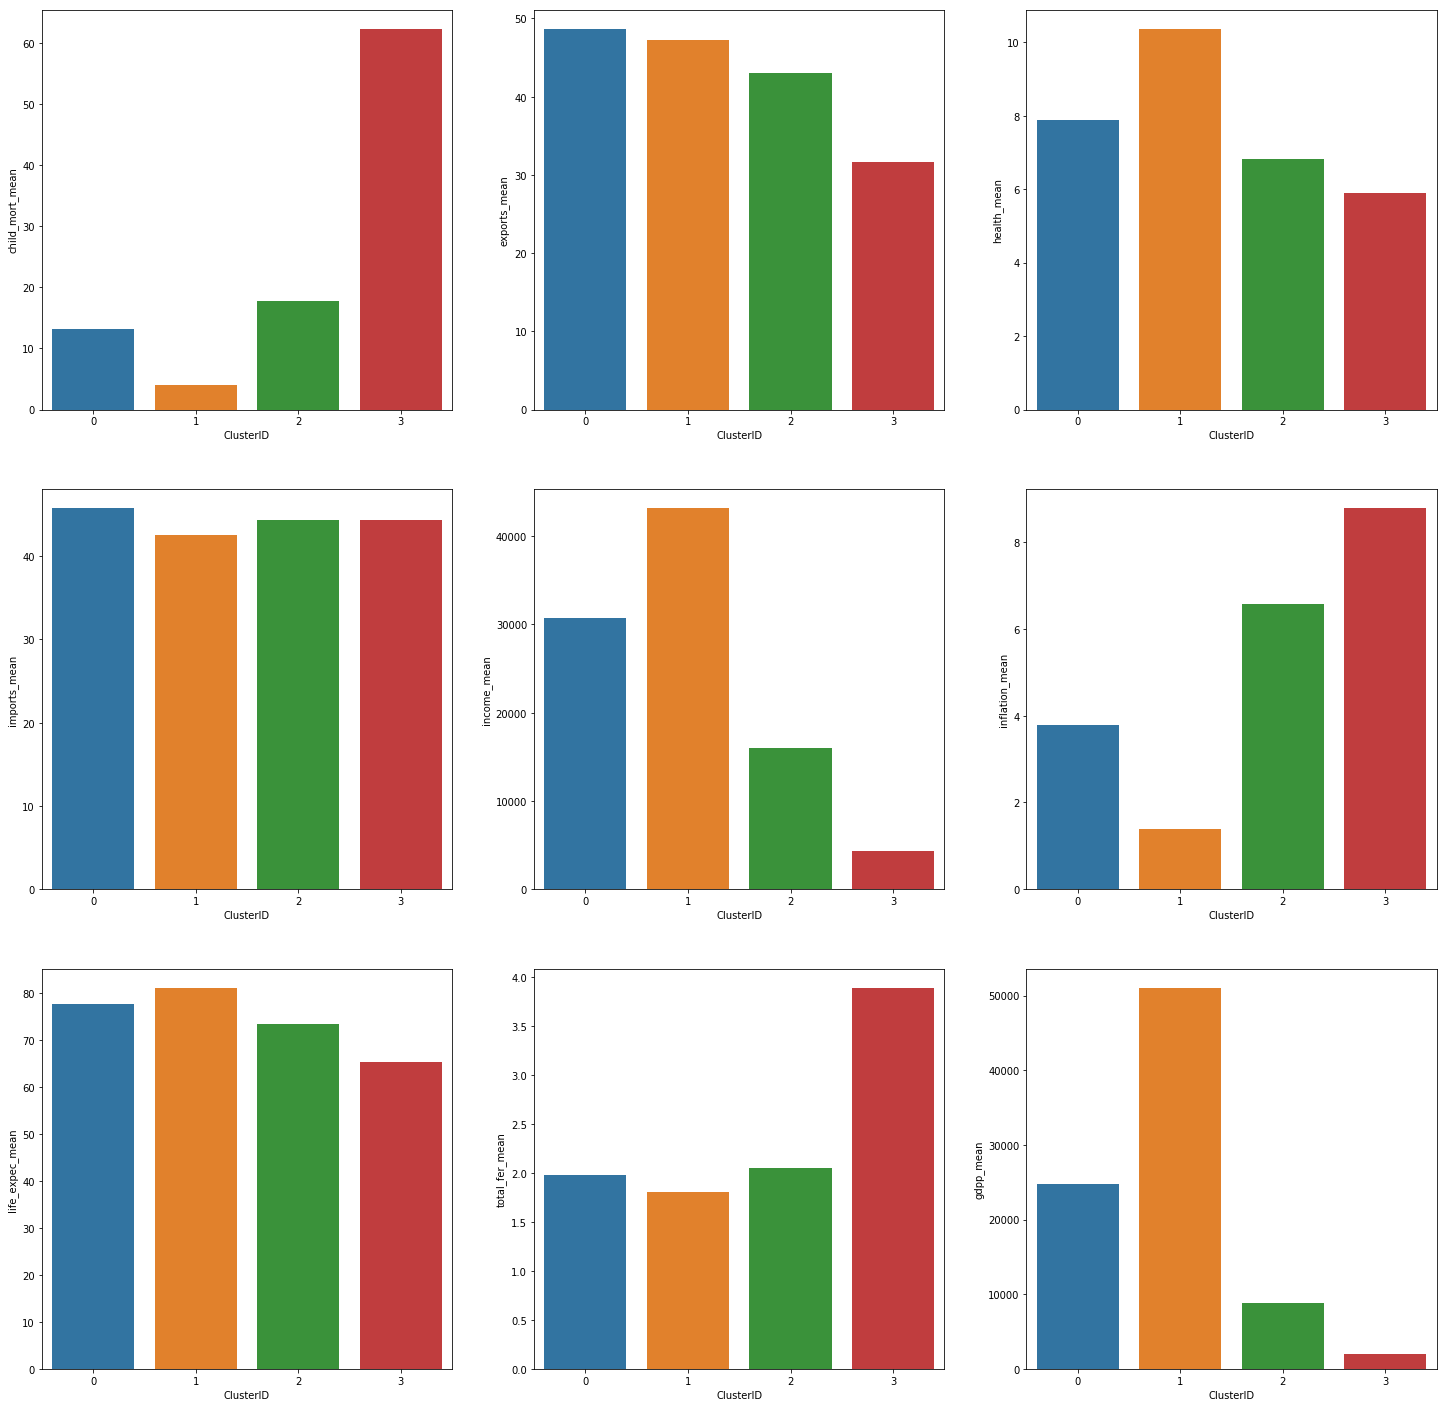

In [40]:
plt.figure(figsize=(25, 25))
plt.subplot(3,3,1)
sns.barplot(x=clus_human.ClusterID, y=clus_human.child_mort_mean)
plt.subplot(3,3,2)
sns.barplot(x=clus_human.ClusterID, y=clus_human.exports_mean)
plt.subplot(3,3,3)
sns.barplot(x=clus_human.ClusterID, y=clus_human.health_mean)
plt.subplot(3,3,4)
sns.barplot(x=clus_human.ClusterID, y=clus_human.imports_mean)
plt.subplot(3,3,5)
sns.barplot(x=clus_human.ClusterID, y=clus_human.income_mean)
plt.subplot(3,3,6)
sns.barplot(x=clus_human.ClusterID, y=clus_human.inflation_mean)
plt.subplot(3,3,7)
sns.barplot(x=clus_human.ClusterID, y=clus_human.life_expec_mean)
plt.subplot(3,3,8)
sns.barplot(x=clus_human.ClusterID, y=clus_human.total_fer_mean)
plt.subplot(3,3,9)
sns.barplot(x=clus_human.ClusterID, y=clus_human.gdpp_mean)

In [41]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

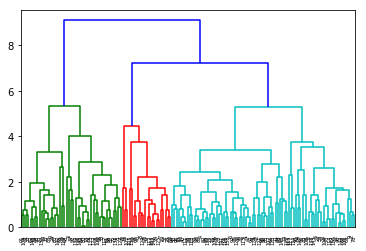

In [42]:
# heirarchical clustering
hc_human_data=human_final_df2[["PC1","PC2","PC3","PC4"]]
hc_human_data
human_hc= linkage(hc_human_data, method = "complete", metric='euclidean')
dendrogram(human_hc)
plt.show()

In [43]:
clustCut = pd.Series(cut_tree(human_hc, n_clusters = 4).reshape(-1,))
country_hc = pd.concat([human_final_df1, clustCut], axis=1)
country_hc.columns=['country','PC1','PC2','PC3','PC4','child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']
country_hc.head()

,country,PC1,PC2,PC3,PC4,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,0.429358,-0.587859,0.321052,-1.171193,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,-2.930969,1.699437,-1.521734,0.875966,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [44]:
hc_clusters_child_mort = pd.DataFrame(human_hc1.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = pd.DataFrame(human_hc1.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = pd.DataFrame(human_hc1.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = pd.DataFrame(human_hc1.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = pd.DataFrame(human_hc1.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = pd.DataFrame(human_hc1.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec =pd.DataFrame(human_hc1.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = pd.DataFrame(human_hc1.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = pd.DataFrame(human_hc1.groupby(["ClusterID"]).gdpp.mean())

NameError: name 'human_hc1' is not defined

In [ ]:
clus_human_hc = pd.concat([pd.Series([0,1,2,3]), hc_clusters_child_mort ,hc_clusters_exports ,hc_clusters_health ,hc_clusters_imports 
                        ,hc_clusters_income ,hc_clusters_inflation,hc_clusters_life_expec 
                        ,hc_clusters_total_fer ,hc_clusters_gdpp], axis=1)
clus_human_hc.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", 
                      "imports_mean", "income_mean", "inflation_mean", "life_expec_mean", "total_fer_mean","gdpp_mean"]
clus_human_hc

In [ ]:
plt.figure(figsize=(25, 25))
plt.subplot(3,3,1)
sns.barplot(x=clus_human_hc.ClusterID, y=clus_human_hc.child_mort_mean)
plt.subplot(3,3,2)
sns.barplot(x=clus_human_hc.ClusterID, y=clus_human_hc.exports_mean)
plt.subplot(3,3,3)
sns.barplot(x=clus_human_hc.ClusterID, y=clus_human_hc.health_mean)
plt.subplot(3,3,4)
sns.barplot(x=clus_human_hc.ClusterID, y=clus_human_hc.imports_mean)
plt.subplot(3,3,5)
sns.barplot(x=clus_human_hc.ClusterID, y=clus_human_hc.income_mean)
plt.subplot(3,3,6)
sns.barplot(x=clus_human_hc.ClusterID, y=clus_human_hc.inflation_mean)
plt.subplot(3,3,7)
sns.barplot(x=clus_human_hc.ClusterID, y=clus_human_hc.life_expec_mean)
plt.subplot(3,3,8)
sns.barplot(x=clus_human_hc.ClusterID, y=clus_human_hc.total_fer_mean)
plt.subplot(3,3,9)
sns.barplot(x=clus_human_hc.ClusterID, y=clus_human_hc.gdpp_mean)

In [ ]:
#seprating kmeans cluster=3 as it has child mortality, low exports, low health spending, high imports as comapred to exports, 
#net income is quite low, life expectency is low as compared to other clusters, total fretility is high (people uneducated 
#and have less of work as expected rate is high), gdp figures are quite low
country=human_km.loc[human_km["ClusterID"]==3]
country.shape

In [ ]:
country